In [1]:
from windrose import WindroseAxes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read Input

1. Hydraulic input conditions
2. Damage levels

In [2]:
df_input_hydraulic = pd.read_excel('Excel_Files/Input_Energy_Island.xlsx', sheet_name= 'Hydraulic_Design_Conditions')
df_input_damage = pd.read_excel('Excel_Files/Input_Energy_Island.xlsx', sheet_name= 'Design_Requirements')

In [3]:
df_input_hydraulic.head(3)

,Case_ID,DIR (deg_N),Hm0(m),Tp(s),ReturnPeriod(YR),Design high water level (LAT+m),Design low water level (LAT+m)
0,1,0,3.9,10.4,1,2.41,0
1,2,45,4.2,9.1,1,2.41,0
2,3,90,3.4,7.3,1,2.41,0


In [4]:
df_input_damage.head(3)

,ReturnPeriod(YR),"Damage Rock Armour accepted, S (-)",Damage Toe accepted NoD (-),Overtopping accepted q (l/s/m)
0,1,2,0.5,1
1,5,2,0.5,10
2,10,2,0.5,10


#### Choose a return period

In [5]:
RP = 1000

In [6]:
df_input_hydraulic = df_input_hydraulic[df_input_hydraulic['ReturnPeriod(YR)'] == RP].reset_index()
df_input_damage = df_input_damage[df_input_damage['ReturnPeriod(YR)'] == RP].reset_index()

#### Wave conditions

In [7]:
df_input_hydraulic

,index,Case_ID,DIR (deg_N),Hm0(m),Tp(s),ReturnPeriod(YR),Design high water level (LAT+m),Design low water level (LAT+m)
0,48,49,0,8.4,13.2,1000,3.41,0
1,49,50,45,8.8,11.8,1000,3.41,0
2,50,51,90,6.7,9.1,1000,3.41,0
3,51,52,135,7.5,10.1,1000,3.41,0
4,52,53,180,10.0,13.0,1000,3.41,0
5,53,54,225,11.4,13.8,1000,3.41,0
6,54,55,270,12.8,15.8,1000,3.41,0
7,55,56,315,13.1,17.0,1000,3.41,0


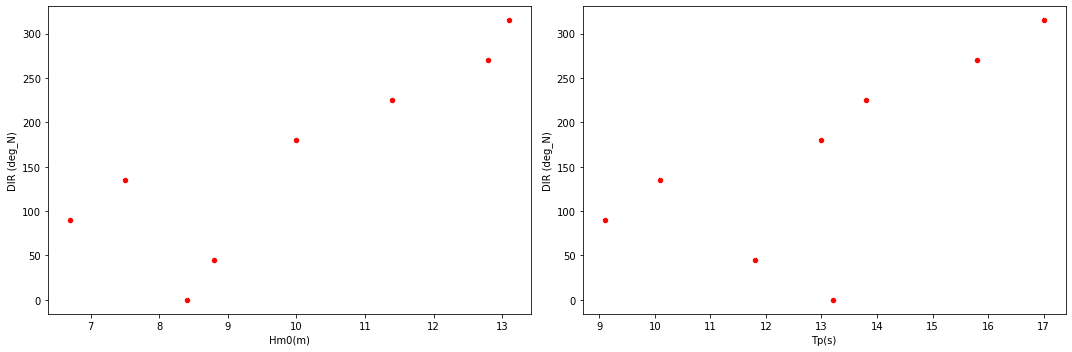

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

df_input_hydraulic.plot('Hm0(m)', 'DIR (deg_N)', color= 'r', kind= 'scatter', ax= ax1);
df_input_hydraulic.plot('Tp(s)', 'DIR (deg_N)', color= 'r', kind= 'scatter', ax= ax2);

fig.tight_layout()

#### Damage levels

In [9]:
df_input_damage

,index,ReturnPeriod(YR),"Damage Rock Armour accepted, S (-)",Damage Toe accepted NoD (-),Overtopping accepted q (l/s/m)
0,6,1000,4,3.0,100


In [10]:
Sd = df_input_damage['Damage Rock Armour accepted, S (-)'].values[0]
NoD = df_input_damage['Damage Toe accepted NoD (-)'].values[0]
q = df_input_damage['Overtopping accepted q (l/s/m)'].values[0]